In [30]:
%pip install nbformat
%pip install import_ipynb
%pip install keras

import import_ipynb
import DataCleaning


import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
import pandas as pd
import os
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Reshape
from sklearn.metrics import classification_report, confusion_matrix
import itertools as it





Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Performing PCA on the RGB Dataset, the Performing CNN

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import os

train_dir  = '../archive/train'
test_dir = '../archive/test'
train_datagen = ImageDataGenerator(rescale=1./255)  # 20% for validation


test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# Training data
train_generator = DataCleaning.TRAIN_GENERATOR_RGB
print(len(train_generator))

# Get filenames for the training data
train_filenames = train_generator.filenames

# Concatenate batches
train_images = np.concatenate([train_generator[i][0] for i in range(len(train_generator))])

# Flatten the images before applying PCA
train_images_flatten = train_images.reshape((train_images.shape[0], -1))

# Apply PCA on Training Data
pca = PCA(n_components=298)
pca_train_data_RGB = pca.fit_transform(train_images_flatten)

# Testing data
test_generator = DataCleaning.TEST_GENERATOR_RGB
print(len(test_generator))

# Get filenames for the testing data
test_filenames = test_generator.filenames

# Concatenate batches
test_images = np.concatenate([test_generator[i][0] for i in range(len(test_generator))])

# Flatten the images before applying PCA
test_images_flatten = test_images.reshape((test_images.shape[0], -1))

# Apply PCA on Testing Data using the PCA model fitted on the training data
pca_test_data_RGB = pca.transform(test_images_flatten)


3125


625


In [32]:
print(np.shape(pca_test_data_RGB)) #(20000, 298)
print(np.shape(pca_train_data_RGB)) #() 

(20000, 298)
(100000, 298)


In [33]:
X_train_pca_cnn = pca_train_data_RGB.reshape(pca_train_data_RGB.shape[0], 1, 1, pca_train_data_RGB.shape[1])
X_test_pca_cnn = pca_test_data_RGB.reshape(pca_test_data_RGB.shape[0], 1, 1, pca_test_data_RGB.shape[1])

# Build a simple CNN model
modelRGB = Sequential()
modelRGB.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(1, 1, pca_train_data_RGB.shape[1])))
modelRGB.add(layers.MaxPooling2D(pool_size=(1, 1)))
modelRGB.add(Flatten())
modelRGB.add(Dense(128, activation='relu'))
modelRGB.add(Dense(2, activation='softmax'))  # Assuming 2 classes for binary class classification

modelRGB.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model using PCA-transformed data
historyRGB = modelRGB.fit(X_train_pca_cnn, train_generator.classes, epochs=10, validation_data=(X_test_pca_cnn, test_generator.classes))

Epoch 1/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4775 - accuracy: 0.7643 - val_loss: 0.4290 - val_accuracy: 0.7957
Epoch 2/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4022 - accuracy: 0.8150 - val_loss: 0.4084 - val_accuracy: 0.8073
Epoch 3/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3714 - accuracy: 0.8320 - val_loss: 0.3945 - val_accuracy: 0.8166
Epoch 4/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3504 - accuracy: 0.8437 - val_loss: 0.3949 - val_accuracy: 0.8185
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3363 - accuracy: 0.8501 - val_loss: 0.3910 - val_accuracy: 0.8194
Epoch 6/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3227 - accuracy: 0.8586 - val_loss: 0.3993 - val_accuracy: 0.8171
Epoch 7/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3125 - accuracy: 0.8632 - val_loss: 0.3987 - val_accuracy:

### Performing PCA on the Gray Data, then Performing CNN

In [34]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import os

train_dir  = '../archive/train'
test_dir = '../archive/test'
train_datagen = ImageDataGenerator(rescale=1./255)  # 20% for validation


test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# Training data
train_generator = DataCleaning.TRAIN_GENERATOR_GRAY
print(len(train_generator))

# Get filenames for the training data
train_filenames = train_generator.filenames

# Concatenate batches
train_images = np.concatenate([train_generator[i][0] for i in range(len(train_generator))])

# Flatten the images before applying PCA
train_images_flatten = train_images.reshape((train_images.shape[0], -1))

# Apply PCA on Training Data
pca = PCA(n_components=298)
pca_train_data_GRAY = pca.fit_transform(train_images_flatten)

# Testing data
test_generator = DataCleaning.TEST_GENERATOR_GRAY
print(len(test_generator))

# Get filenames for the testing data
test_filenames = test_generator.filenames

# Concatenate batches
test_images = np.concatenate([test_generator[i][0] for i in range(len(test_generator))])

# Flatten the images before applying PCA
test_images_flatten = test_images.reshape((test_images.shape[0], -1))

# Apply PCA on Testing Data using the PCA model fitted on the training data
pca_test_data_GRAY = pca.transform(test_images_flatten)

3125
625


In [35]:
X_train_pca_cnn_GRAY = pca_train_data_GRAY.reshape(pca_train_data_GRAY.shape[0], 1, 1, pca_train_data_GRAY.shape[1])
X_test_pca_cnn = pca_test_data_GRAY.reshape(pca_test_data_GRAY.shape[0], 1, 1, pca_test_data_GRAY.shape[1])

# Build a simple CNN model
modelGRAY = Sequential()
modelGRAY.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(1, 1, pca_train_data_GRAY.shape[1])))
modelGRAY.add(layers.MaxPooling2D(pool_size=(1, 1)))
modelGRAY.add(Flatten())
modelGRAY.add(Dense(128, activation='relu'))
modelGRAY.add(Dense(2, activation='softmax'))  # Assuming 2 classes for binary class classification

modelGRAY.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model using PCA-transformed data
historyGRAY = modelGRAY.fit(X_train_pca_cnn_GRAY, train_generator.classes, epochs=10, validation_data=(X_test_pca_cnn, test_generator.classes))

Epoch 1/10
3125/3125 [==============================] - 5s 1ms/step - loss: 0.5324 - accuracy: 0.7257 - val_loss: 0.4942 - val_accuracy: 0.7564
Epoch 2/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4619 - accuracy: 0.7792 - val_loss: 0.4773 - val_accuracy: 0.7644
Epoch 3/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4288 - accuracy: 0.7984 - val_loss: 0.4619 - val_accuracy: 0.7781
Epoch 4/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.4083 - accuracy: 0.8124 - val_loss: 0.4537 - val_accuracy: 0.7842
Epoch 5/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3929 - accuracy: 0.8211 - val_loss: 0.4563 - val_accuracy: 0.7839
Epoch 6/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3803 - accuracy: 0.8272 - val_loss: 0.4528 - val_accuracy: 0.7897
Epoch 7/10
3125/3125 [==============================] - 4s 1ms/step - loss: 0.3699 - accuracy: 0.8329 - val_loss: 0.4563 - val_accuracy:

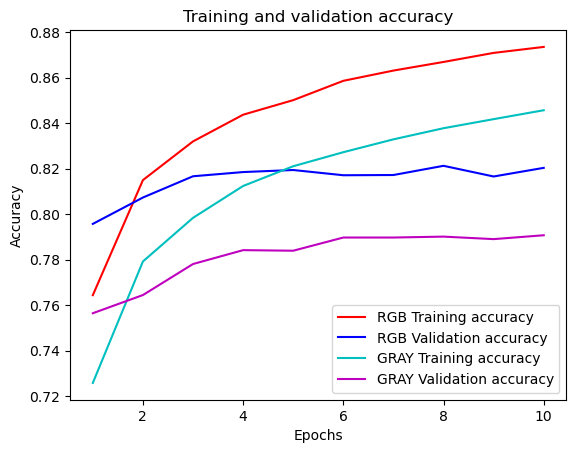

In [36]:
import matplotlib.pyplot as plt

# Training history
acc = historyRGB.history['accuracy']
val_acc = historyRGB.history['val_accuracy']
acc2 = historyGRAY.history['accuracy']
val_acc2 = historyGRAY.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'r', label='RGB Training accuracy')  # Change color to red and use dashed line
plt.plot(epochs, val_acc, 'b', label='RGB Validation accuracy')
plt.plot(epochs, acc2, 'c', label='GRAY Training accuracy')  # Change color to red and use dashed line
plt.plot(epochs, val_acc2, 'm', label='GRAY Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


/var/folders/rz/ykytq7l5119gjrmrv_f16z8m0000gn/T/ipykernel_28265/3516478568.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred_gray = modelGRAY.predict_generator(X_train_pca_cnn_GRAY)
/var/folders/rz/ykytq7l5119gjrmrv_f16z8m0000gn/T/ipykernel_28265/3516478568.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred_RBG = modelRGB.predict_generator(X_train_pca_cnn)



Classification Report - modelGRAY

              precision    recall  f1-score   support

        FAKE       0.85      0.87      0.86     50000
        REAL       0.87      0.85      0.86     50000

    accuracy                           0.86    100000
   macro avg       0.86      0.86      0.86    100000
weighted avg       0.86      0.86      0.86    100000


Classification Report - modelRGB

              precision    recall  f1-score   support

        FAKE       0.89      0.90      0.89     50000
        REAL       0.90      0.88      0.89     50000

    accuracy                           0.89    100000
   macro avg       0.89      0.89      0.89    100000
weighted avg       0.89      0.89      0.89    100000



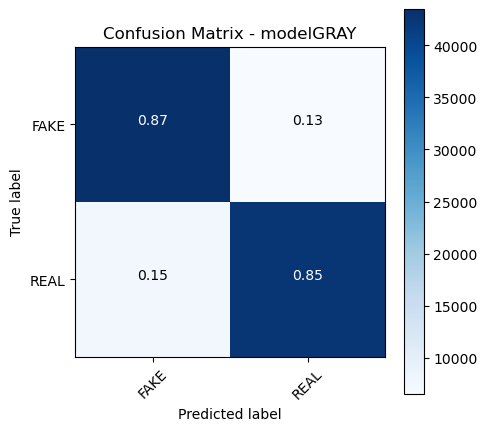

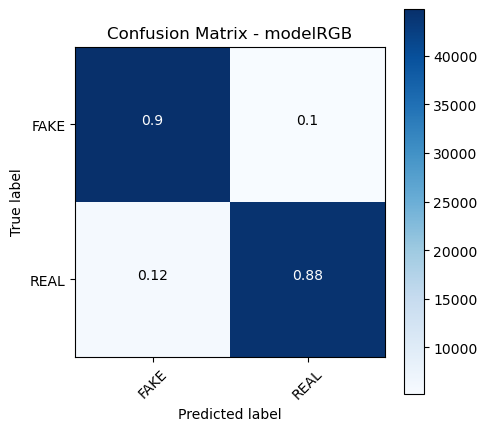

In [47]:
#Credit to Sydney DeFelice for Code from CNN.ipynb
def plot_confusion_matrix(cm, title, target_names, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5,5))

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    # NORMALIZE:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0

    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#ensure PCA data is used in confusion matrix 
Y_pred_gray = modelGRAY.predict_generator(X_train_pca_cnn_GRAY)
y_pred_gray = np.argmax(Y_pred_gray, axis=1)

#ensure PCA data is used in confusion matrix 
Y_pred_RBG = modelRGB.predict_generator(X_train_pca_cnn)
y_pred_RGB = np.argmax(Y_pred_RBG, axis=1)

cm_gray = confusion_matrix(DataCleaning.TRAIN_GENERATOR_GRAY.classes, y_pred_gray)
cm_RGB = confusion_matrix(DataCleaning.TRAIN_GENERATOR_RGB.classes, y_pred_RGB)

target_names_gray = []
target_names_RGB = []

for key in DataCleaning.TRAIN_GENERATOR_GRAY.class_indices:
    target_names_gray.append(key)

for key in DataCleaning.TRAIN_GENERATOR_RGB.class_indices:
    target_names_RGB.append(key)

print('\nClassification Report - modelGRAY\n')
print(classification_report(DataCleaning.TRAIN_GENERATOR_GRAY.classes, y_pred_gray, target_names=target_names_gray))

print('\nClassification Report - modelRGB\n')
print(classification_report(DataCleaning.TRAIN_GENERATOR_RGB.classes, y_pred_RGB, target_names=target_names_RGB))

plot_confusion_matrix(cm_gray,title="Confusion Matrix - modelGRAY",target_names=target_names_gray)
plot_confusion_matrix(cm_RGB,title="Confusion Matrix - modelRGB",target_names=target_names_RGB)